## 문제 정의<br>

- 타이타닉 탑승자 명단을 통해 생존자 분석: 디카프리오는 정말 살 수 없었을까?
 (1912년 4월 10일 영국 Southampton에서 출발하고 5일 후, 1912년 4월 15일 침몰)

- 이진 분류 예제에 적합한 데이터셋 중 6개 변수, 1개 변수는 생존 결과로 1이면 생존, 0이면 사망

- 타이타닉 생존자 예측 데이터 셋 → 6개 변수를 독립변수로 보고 생존 유무를 예측하는 이진 분류 문제로 정의

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

x_data = pd.read_excel('titanic.xlsx')
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


## 생존률 확인

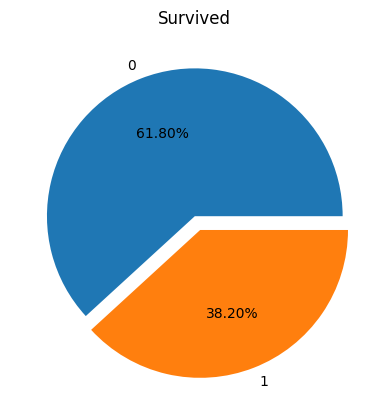

In [2]:
x_data['survived'].value_counts().plot.pie(autopct='%.2f%%', explode=[0, 0.10]);
plt.title('Survived')
plt.axis('off');

In [3]:
x_data['survived'].value_counts()
# 사망자(0): 61.80% (809) , 생존자(1): 38.20% (500)

0    809
1    500
Name: survived, dtype: int64

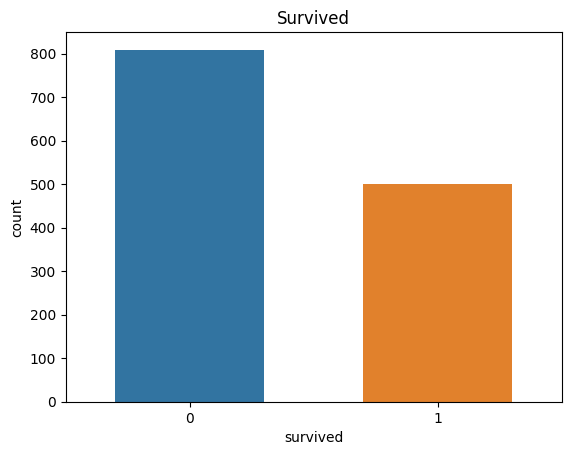

In [4]:
sns.countplot(data=x_data, x='survived', width = 0.6);
plt.title('Survived');

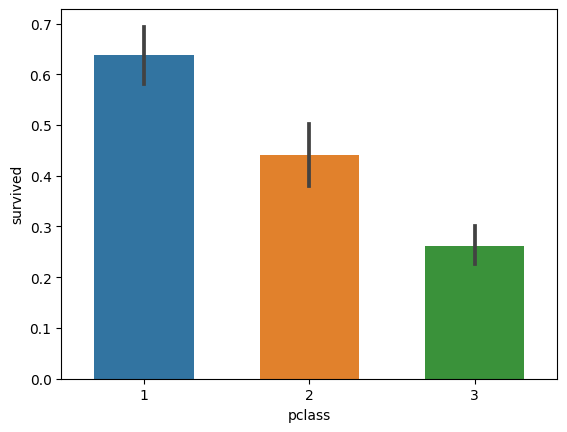

In [70]:
sns.barplot(data = x_data, x = 'pclass', y = 'survived', width=0.6)
plt.show()

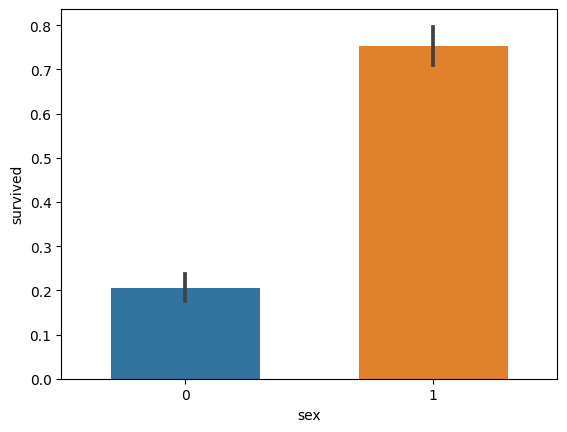

In [78]:
sns.barplot(data=x_data, x='sex', y='survived', width=0.6)
plt.show()

## 신경망 모델 만들기

In [5]:
x_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [6]:
x_data['sex'] = np.where(x_data['sex'] == 'female', 1, 0)
x_data['sex'].value_counts()

0    843
1    466
Name: sex, dtype: int64

In [7]:
x_data.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [39]:
nan_del1 = x_data.dropna(subset=['age'], how='any', axis=0, inplace=True)
nan_del2 = x_data.dropna(subset=['fare'], how='any', axis=0, inplace=True)
x_data.isna().sum()

pclass         0
survived       0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
cabin        773
embarked       2
boat         628
body         926
home.dest    360
dtype: int64

In [40]:
float_need = ['pclass','survived', 'sex', 'age', 'sibsp', 'parch', 'fare']
df = x_data[float_need].astype(float)

In [41]:
df.head()

,pclass,survived,sex,age,sibsp,parch,fare
0,1.0,1.0,1.0,29.0000,0.0,0.0,211.3375
1,1.0,1.0,0.0,0.9167,1.0,2.0,151.5500
2,1.0,0.0,1.0,2.0000,1.0,2.0,151.5500
3,1.0,0.0,0.0,30.0000,1.0,2.0,151.5500
4,1.0,0.0,1.0,25.0000,1.0,2.0,151.5500


In [42]:
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare']]
y = df['survived']

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1045 entries, 0 to 1308
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  1045 non-null   float64
 1   sex     1045 non-null   float64
 2   age     1045 non-null   float64
 3   sibsp   1045 non-null   float64
 4   parch   1045 non-null   float64
 5   fare    1045 non-null   float64
dtypes: float64(6)
memory usage: 57.1 KB


In [44]:
X.shape, y.shape

((1045, 6), (1045,))

In [45]:
from sklearn.model_selection import train_test_split
# 9:1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7)

X_train.shape, y_test.shape

((940, 6), (105,))

In [46]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(255, activation='relu', input_shape = (6, )))
model.add(Dense(1, activation='sigmoid'))

In [47]:
model.compile(optimizer='adam', # 옵티마이저
              loss='mse', # 손실함수
              metrics=['acc']) # 모니터링할 평가지표

In [48]:
history = model.fit(X_train, y_train, epochs=300)

Epoch 1/300
30/30 [==============================] - 1s 1ms/step - loss: 0.3382 - acc: 0.5734
Epoch 2/300
30/30 [==============================] - 0s 2ms/step - loss: 0.2249 - acc: 0.6628
Epoch 3/300
30/30 [==============================] - 0s 2ms/step - loss: 0.2025 - acc: 0.7064
Epoch 4/300
30/30 [==============================] - 0s 2ms/step - loss: 0.1853 - acc: 0.7330
Epoch 5/300
30/30 [==============================] - 0s 2ms/step - loss: 0.1761 - acc: 0.7564
Epoch 6/300
30/30 [==============================] - 0s 2ms/step - loss: 0.1743 - acc: 0.7564
Epoch 7/300
30/30 [==============================] - 0s 2ms/step - loss: 0.1754 - acc: 0.7489
Epoch 8/300
30/30 [==============================] - 0s 2ms/step - loss: 0.1633 - acc: 0.7777
Epoch 9/300
30/30 [==============================] - 0s 2ms/step - loss: 0.1553 - acc: 0.7872
Epoch 10/300
30/30 [==============================] - 0s 2ms/step - loss: 0.1574 - acc: 0.7723
Epoch 11/300
30/30 [==============================] - 0s 2m

In [50]:
# model.evaluate
model.evaluate(X_test, y_test)

4/4 [==============================] - 29s 4ms/step - loss: 0.1487 - acc: 0.8095


[0.14872883260250092, 0.8095238208770752]

In [62]:
#classification_report
from sklearn.metrics import classification_report, confusion_matrix

# 모델 예측
y_pred = model.predict(X_test)

# # 혼동 행렬
# plt.figure(figsize=(7,7))
# cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('predicted label')
# plt.ylabel('true label')
# plt.show()
print('\n', classification_report(np.argmax(y_test), np.argmax(y_pred)))

4/4 [==============================] - 0s 4ms/step


TypeError: ignored

In [52]:
#accuracy, precision, recall, f1-score
from sklearn import svm
from sklearn import metrics

# 모델 객체 생성 kernel='rbf'
# 벡터 공간을 맵핑하는 함수 -> 선형(linear), 다항식(ploy), 가우시안 RBF(rbf), 시그모이드(sigmoid)
svm_model = svm.SVC(kernel='rbf').fit(X_train, y_train)

print('훈련데이터셋 :', svm_model.score(X_train, y_train))
print('테스트데이터셋 :', svm_model.score(X_test, y_test))
print('')

y_pred = svm_model.predict(X_test)

print('accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('precision: ', metrics.precision_score(y_test, y_pred))
print('recall: ', metrics.recall_score(y_test, y_pred))
print('f1: ', metrics.f1_score(y_test, y_pred))

훈련데이터셋 : 0.6627659574468086
테스트데이터셋 : 0.7142857142857143

accuracy:  0.7142857142857143
precision:  0.76
recall:  0.4418604651162791
f1:  0.5588235294117647


In [49]:
#roc_curve

In [64]:
dicaprio = np.array([3., 0., 19., 0., 0., 5.]).reshape(1,6)
winslet = np.array([1., 1., 17., 1., 2., 100.]).reshape(1,6)

d_predict = model.predict(dicaprio)
print('디카프리오 생존 확률 : %.2f%%' %(d_predict * 100))

w_predict = model.predict(winslet)
print('윈슬렛 생존 확률 : %.2f%%' %(w_predict * 100))

1/1 [==============================] - 0s 96ms/step
디카프리오 생존 확률 : 22.58%
1/1 [==============================] - 0s 44ms/step
윈슬렛 생존 확률 : 99.97%
